In [1]:
import pandas as pd
import numpy as np
import random
from utils.utils import split_samples, generate_connectivity_matrix, find_neighbors
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from models.AE_model import AE
from models.MLP_classifier import MLP_classifier
from torchvision import transforms
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# random.seed(100)
# np.random.seed(42)

In [2]:
df = pd.read_csv('dataset/hmnist_28_28_L.csv')

In [3]:
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
0,101,110,154,160,95,44,139,184,164,160,...,103,73,72,75,152,130,96,133,159,2
1,67,66,69,76,80,57,46,67,90,77,...,58,65,74,80,81,83,77,75,73,2
2,127,137,121,140,170,111,128,117,60,105,...,90,100,143,119,148,140,193,146,97,2
3,80,90,101,106,120,100,99,66,63,91,...,131,109,97,102,71,93,120,84,62,2
4,153,141,121,132,110,131,119,99,101,91,...,117,121,136,178,192,210,189,149,155,2


In [4]:
# Fazendo as transformações nos conjuntos
positive_samples, labels = split_samples(df)

X = torch.tensor(df.iloc[:, :-1].values, dtype = torch.float32)
y = torch.tensor(df.label)

In [5]:
# X = X.view(-1, 28,28,3)
X = X/255
dataset = TensorDataset(X, y)
batch_size = 100
dataloader = DataLoader(dataset, batch_size=batch_size)

In [6]:
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X)

In [7]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)

In [8]:
autoencoder = AE()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr = 0.00000001)

# Training the autoencoder
num_epochs = 10

for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        optimizer.zero_grad()
        outputs = autoencoder(img)
        loss = F.mse_loss(outputs, img)
        loss.backward()
        optimizer.step()
        # print(loss)

# print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    print(f'loss {loss.item():.4f}')

X_AE = autoencoder.encoder(X)

loss 0.1575
loss 0.1575
loss 0.1575
loss 0.1575
loss 0.1575
loss 0.1575
loss 0.1575
loss 0.1575
loss 0.1575
loss 0.1575


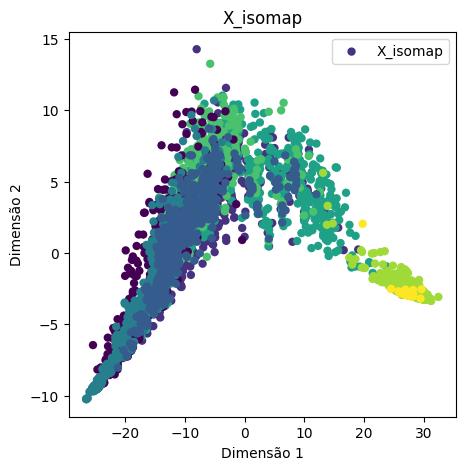

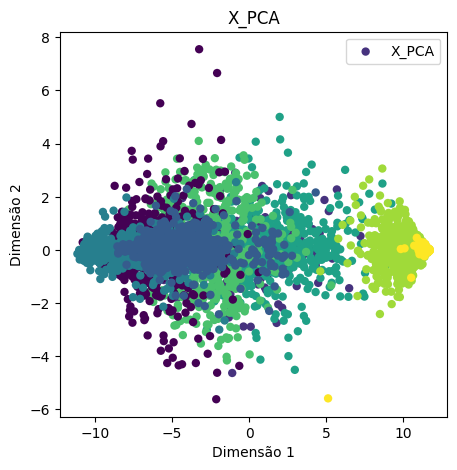

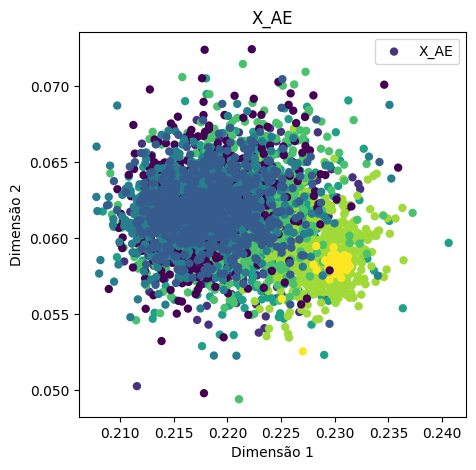

In [9]:
import matplotlib.pyplot as plt

mask_colors = torch.full((len(y),), 0)
for element in positive_samples:
    mask_colors[element] = y[element]

# Função para plotar os dados
def plot_data(X, title, xlabel, ylabel, label):
    plt.figure(figsize=(5, 5))
    plt.scatter(*zip(*X), c=y, label=label, linewidths=0.01)  # Adicionando a variável y como cor
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Plot para X_isomap
plot_data(X_isomap, 'X_isomap', 'Dimensão 1', 'Dimensão 2', 'X_isomap')

# Plot para X_PCA
plot_data(X_PCA, 'X_PCA', 'Dimensão 1', 'Dimensão 2', 'X_PCA')

# Plot para X_AE
X_AE_np = X_AE.detach().numpy()
plot_data(X_AE_np, 'X_AE', 'Dimensão 1', 'Dimensão 2', 'X_AE')


In [10]:
positive_labels = y[positive_samples]
nearest_neigh_idx, nearest_neigh_labels = find_neighbors(X, positive_labels, positive_samples)

In [11]:
augmented_idx = np.array(positive_labels.tolist() + nearest_neigh_idx)
augmented_labels = np.array(positive_labels.tolist() + nearest_neigh_labels)

In [12]:
augmented_idx

[4,
 2,
 1,
 4,
 4,
 7,
 2,
 1,
 8,
 4,
 4,
 7,
 1,
 3,
 3,
 3,
 6,
 3,
 2,
 4,
 4,
 2,
 4,
 5,
 5,
 2,
 4,
 4,
 1,
 4,
 2,
 6,
 8,
 2,
 4,
 5,
 7,
 1,
 5,
 7,
 7,
 5,
 4,
 5,
 7,
 3,
 1,
 6,
 4,
 5,
 4,
 7,
 3,
 2,
 7,
 6,
 3,
 3,
 5,
 6,
 8,
 5,
 7,
 4,
 1,
 8,
 4,
 1,
 8,
 5,
 2,
 2,
 2,
 4,
 3,
 1,
 5,
 5,
 1,
 7,
 4,
 6,
 3,
 2,
 8,
 7,
 7,
 8,
 7,
 7,
 6,
 6,
 4,
 6,
 5,
 1,
 1,
 4,
 7,
 3,
 8,
 2,
 6,
 4,
 4,
 7,
 8,
 8,
 7,
 6,
 4,
 8,
 7,
 6,
 1,
 1,
 7,
 1,
 6,
 4,
 4,
 1,
 3,
 8,
 6,
 5,
 8,
 5,
 3,
 6,
 1,
 2,
 6,
 3,
 8,
 7,
 8,
 7,
 6,
 3,
 7,
 6,
 2,
 2,
 6,
 1,
 3,
 5,
 1,
 4,
 4,
 8,
 5,
 2,
 6,
 2,
 6,
 6,
 8,
 3,
 2,
 7,
 4,
 4,
 7,
 5,
 7,
 6,
 3,
 6,
 5,
 3,
 5,
 1,
 3,
 6,
 4,
 2,
 3,
 4,
 1,
 1,
 6,
 4,
 8,
 6,
 3,
 7,
 1,
 8,
 6,
 4,
 1,
 3,
 2,
 8,
 8,
 3,
 6,
 1,
 1,
 7,
 3,
 1,
 5,
 3,
 4,
 6,
 2,
 1,
 8,
 4,
 5,
 7,
 5,
 5,
 4,
 4,
 4,
 1,
 4,
 6,
 5,
 5,
 2,
 2,
 8,
 6,
 1,
 2,
 6,
 5,
 5,
 1,
 2,
 4,
 3,
 6,
 4,
 8,
 8,
 2,
 6,
 7,
 3,
 6,
 3,
 4,
 8,
 7,


In [13]:
generate_connectivity_matrix(augmented_idx, augmented_labels, len(X))
# connectivity_matrix = generate_connectivity_matrix(positive_samples, labels, len(df))

TypeError: only integer scalar arrays can be converted to a scalar index

In [16]:
type(augmented_idx)

list

In [ ]:
import matplotlib.pyplot as plt

# Função para plotar os dados
def plot_data(X, title, xlabel, ylabel, label):
    plt.figure(figsize=(5, 5))
    plt.scatter(*zip(*X), c=nearest_neigh, label=label, linewidths=0.01)  # Adicionando a variável y como cor
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Plot para X_isomap
plot_data(X_isomap, 'X_isomap', 'Dimensão 1', 'Dimensão 2', 'X_isomap')

# Plot para X_PCA
plot_data(X_PCA, 'X_PCA', 'Dimensão 1', 'Dimensão 2', 'X_PCA')

# Plot para X_AE
X_AE_np = X_AE.detach().numpy()
plot_data(X_AE_np, 'X_AE', 'Dimensão 1', 'Dimensão 2', 'X_AE')
